# Feature Engineering

## Environment

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={"figure.figsize":(25, 15)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.6g}'.format)


## Dataset AirBnb

In [2]:
df = pd.read_csv("data/airbnb-listings.csv", sep=';')

In [3]:
df_madrid = df[df['City'] == 'Madrid']

In [4]:
df_madrid.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
3,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,NaN,The closest tube station is La Latina (line 5 ...,"You can use the kitchen, the lounge, the terra...",The bedrooms are totally separated: one at one...,Care and respect are both required in the comm...,https://a0.muscache.com/im/pictures/40713802/3...,https://a0.muscache.com/im/pictures/40713802/3...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/40713802/3...,11902716,https://www.airbnb.com/users/show/11902716,Daniel Y Ximena,2014-02-03,"Madrid, Community of Madrid, Spain","Aficionados al cine, la música, los amigos, el...",within a day,100,NaN,https://a0.muscache.com/im/users/11902716/prof...,https://a0.muscache.com/im/users/11902716/prof...,Palacio,1,1,"email,phone,reviews,jumio","Palacio, Madrid, Community of Madrid 28005, Spain",Palacio,Palacio,Centro,Madrid,Community of Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.4101,-3.71475,Apartment,Private room,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Doorman,...",NaN,36,NaN,NaN,NaN,NaN,1,0,2,1125,4 days ago,NaN,1,1,1,1,2017-04-07,80,2014-06-15,2017-04-01,98,10,10,10,10,10,10,NaN,NaN,flexible,1,2.33,"40.41010608050749, -3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
4,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,NaN,The apartment is close to the Ópera metro stat...,The entire apartment is yours.,We are always available to answer questions an...,The Golden Rule shall apply always :) The apar...,https://a0.muscache.com/im/pictures/44239584/c...,https://a0.muscache.com/im/pictures/44239584/c...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/44239584/c...,809083,https://www.airbnb.com/users/show/809083,Michael,2011-07-12,"Madrid, Madrid, Spain",I'm a US expat who enjoys welcoming people fro...,within a day,94,NaN,https://a0.muscache.com/im/users/809083/profil...,https://a0.muscache.com/im/users/809083/profil...,Palacio,3,3,"email,phone,facebook,reviews,jumio,work_email","Palacio, Madrid, Community of Madrid 28013, Spain",Palacio,Palacio,Centro,Madrid,Community of Madrid,28013,Madrid,"Madrid, Spain",ES,Spain,40.417,-3.70944,Apartment,Entire home/apt,2,1

Host Response rate tiene 1655 NaN, y los cuartiles Q2, Q3 y Q4 son 100, portanto tiene muy poca variabilidad.

## Feature Engineering

In [5]:
df_madrid_new_features = df_madrid.copy()

### Name

#### Len

In [6]:
df_madrid_new_features['Name_Len'] = df_madrid['Name'].apply(lambda x: len(x))

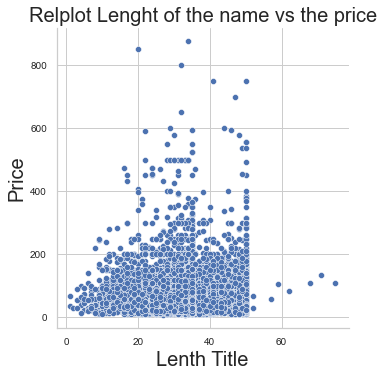

In [7]:
sns.relplot(data=df_madrid_new_features, x='Name_Len', y='Price')
plt.title('Relplot Lenght of the name vs the price', size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Lenth Title', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [8]:
df_madrid_new_features['Name_Len'].unique()

array([34, 32, 27, 35, 33, 24, 29, 16, 41, 42, 22, 46, 28, 39, 47, 49, 50,
       26, 25, 40, 14, 30, 44, 45, 17, 23, 12, 31, 48, 19, 18, 43, 36, 38,
       20, 37, 13, 15, 21, 10,  7, 11,  9, 57,  1,  5,  6,  4,  2, 62,  8,
        3, 68, 71, 59, 52, 75])

In [9]:
df_madrid_new_features['Name_Len'].describe()

count     13207
mean    33.3023
std     9.02144
min           1
25%          28
50%          33
75%          38
max          75
Name: Name_Len, dtype: float64

In [10]:
df_madrid_new_features[['Name_Len','Price']].corr()

,Name_Len,Price
Name_Len,1,0.0256071
Price,0.0256071,1


#### Idioma

In [11]:
import langdetect

In [12]:
langdetect.detect("Hello World my fried is rich")

'en'

In [13]:
def is_str_english(string):
    '''
    Detects if a language is english or not
    input: string
    output: bool
    '''
    try:
        if string != string: #NaN --> False
            return False
        else:
            return langdetect.detect(string)=='en'
    except:
        return False

In [14]:
df_madrid['Name'].shape[0]

13207

In [15]:
df_madrid['Name'].iloc[12]

'Apartamento para dos en La Latina'

In [16]:
is_str_english((df_madrid['Name'].iloc[12]))

False

In [17]:
is_str_english(np.nan)

False

In [18]:
df_madrid_new_features['Name_Lang'] = df_madrid['Name'].apply(lambda x: is_str_english(x))

In [19]:
df_madrid_new_features['Name_Lang'].unique()

array([ True, False])

### Summary

#### Len

In [20]:
df_madrid['Summary'].unique()

array(['Double room with own bathroom in La Latina, in the heart of Madrid.',
       "Old world charm meets modern comfort in our newly-renovated, non-smoking 1-BR apartment with a/c in an elevator building in one of Madrid's grandest neighborhoods. Steps from Plaza Mayor, Ópera, royal palace, shopping, and major subway hubs.",
       "Lominous room for rent in the heart of the old Madrid (see location), between La Latina and Puerta de Toledo metro stations, is also very near Tirso de Molina. It's situated in the best tapa´s zone of the city but in a quite street.",
       ...,
       'El apartamento está en el corazón de Madrid, es muy silencioso, cómodo y confortable.',
       'With a fantastic location just off the vibrant Gran Via avenue in Madrid’s city centre, this two bedroom apartment is a great choice for those looking to immerse themselves in inner-city life.',
       'Big room for rent,  with a balcony. With furniture, 135cm Bed. Not smoking. I have a nice cat. Very central 

In [21]:
df_madrid_new_features['Summary_Len'] = df_madrid['Summary'].apply(lambda x: len(x) if x == x else 0) #NaN len == 0

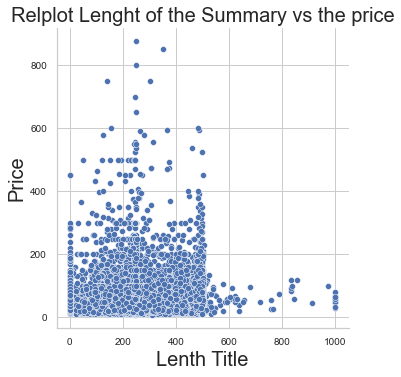

In [22]:
sns.relplot(data=df_madrid_new_features, x='Summary_Len', y='Price')
plt.title('Relplot Lenght of the Summary vs the price', size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Lenth Title', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [23]:
df_madrid_new_features['Summary_Len'].describe()

count     13207
mean    270.512
std     132.923
min           0
25%         202
50%         247
75%         353
max        1000
Name: Summary_Len, dtype: float64

In [24]:
df_madrid_new_features[['Summary_Len','Price']].corr()

,Summary_Len,Price
Summary_Len,1,0.00539261
Price,0.00539261,1


#### Language

In [25]:
df_madrid['Summary'].iloc[12]

'Lugares de interés: La Latina, Plaza Mayor, Tirso de Molina, El Rastro, Lavapies. Te va a encantar mi espacio porque se trata de un apartamento luminoso y muy bien ubicado. Perfecto para dos personas que les apetezca callejear y disfrutar de Madrid y del barrio, teniendo además la opción de cocinar y relajarse en casa.'

In [26]:
is_str_english(df_madrid['Summary'].iloc[12])

False

In [27]:
df_madrid_new_features['Summary_Lang'] = df_madrid['Summary'].apply(lambda x: is_str_english(x))

In [28]:
df_madrid_new_features['Summary_Lang'].unique()

array([ True, False])

### Space

#### Len

In [29]:
df_madrid['Space'].unique()

array(["The apartment is spacious and cozy. It is 90 m2, it has a terrace, 2 rooms, 2 baths, kitchen and lounge. The building has 2 elevators and doorman. The room is double (1 ó 2 guests), 11 m2, exterior, with natural light and the bathroom (4'5 m2) has everything  you need for your stay (toothpaste, shampoo, gel...). In addition we offer towels and sheets. The apartment is always clean and tidy in order that we can have a harmonious living space and you feel like you are in your own home.",
       'Designed with the traveler in mind, our one-bedroom apartment in an elevator building (dating to 1850) is in the heart of Madrid -- the perfect place to call home during your visit.   2014 floor-to-ceiling renovations include fully-equipped kitchen; air conditioning and plentiful heating; dishwasher; washer and dryer; bathroom facilities with separate shower, water closet, and wash basin (virtually eliminates bathroom hogging); ample built-in closet space; bedroom with double bed; living/

In [30]:
df_madrid_new_features['Space_Len'] = df_madrid['Space'].apply(lambda x: len(x) if x == x else 0) #NaN len == 0

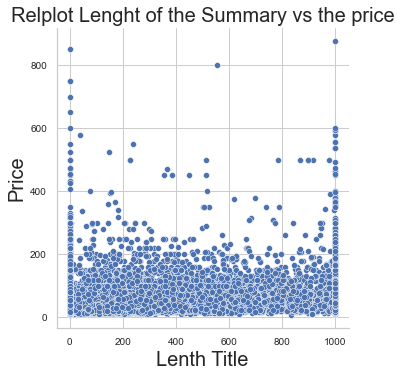

In [31]:
sns.relplot(data=df_madrid_new_features, x='Space_Len', y='Price')
plt.title('Relplot Lenght of the Summary vs the price', size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Lenth Title', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [32]:
df_madrid_new_features['Space_Len'].describe()

count     13207
mean    335.535
std     352.024
min           0
25%           0
50%         216
75%       553.5
max        1000
Name: Space_Len, dtype: float64

In [33]:
df_madrid_new_features[['Space_Len','Price']].corr()

,Space_Len,Price
Space_Len,1,0.188889
Price,0.188889,1


#### Language

In [34]:
df_madrid['Space'].iloc[20]

"Exquisite 180m2 apartment with 2 bedrooms, 1 suite and 2 bathrooms in the heart of the city, 5min. walking distance from Sol. It comfortably accommodates 7 guests. Most of the bedrooms/suites have TV and the kitchen is fully equipped. A huge living room with an ornamental fireplace and a 65' TV completes this outstanding apartment."

In [35]:
is_str_english(df_madrid['Space'].iloc[20])

True

In [36]:
df_madrid_new_features['Space_Lang'] = df_madrid['Space'].apply(lambda x: is_str_english(x))

In [37]:
df_madrid_new_features['Space_Lang'].unique()

array([ True, False])

### Description

#### Len

In [38]:
df_madrid_new_features['Description_Len'] = df_madrid['Description'].apply(lambda x: len(x) if x == x else 0) #NaN len == 0

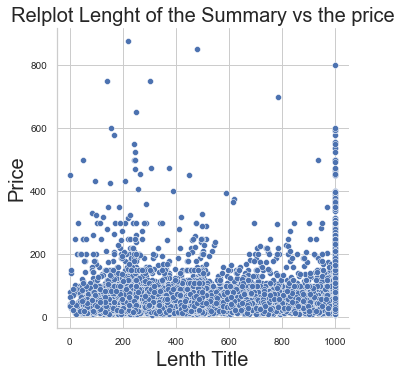

In [39]:
sns.relplot(data=df_madrid_new_features, x='Description_Len', y='Price')
plt.title('Relplot Lenght of the Summary vs the price', size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Lenth Title', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [40]:
df_madrid_new_features['Description_Len'].describe()

count     13207
mean    741.521
std     327.045
min           0
25%         448
50%         999
75%        1000
max        1000
Name: Description_Len, dtype: float64

In [41]:
df_madrid_new_features[['Description_Len','Price']].corr()

,Description_Len,Price
Description_Len,1,0.0682668
Price,0.0682668,1


#### Language

In [42]:
df_madrid['Description'].iloc[12]

'Lugares de interés: La Latina, Plaza Mayor, Tirso de Molina, El Rastro, Lavapies. Te va a encantar mi espacio porque se trata de un apartamento luminoso y muy bien ubicado. Perfecto para dos personas que les apetezca callejear y disfrutar de Madrid y del barrio, teniendo además la opción de cocinar y relajarse en casa.'

In [43]:
is_str_english(df_madrid['Description'].iloc[12])

False

In [44]:
df_madrid_new_features['Description_Lang'] = df_madrid['Description'].apply(lambda x: is_str_english(x))

In [45]:
df_madrid_new_features['Description_Lang'].unique()

array([ True, False])

### 'Thumbnail Url'

#### is_Thumbnail

In [46]:
df_madrid['Thumbnail Url'].iloc[17] == df_madrid['Thumbnail Url'].iloc[17]

False

In [47]:
df_madrid_new_features['is_Thumbnail'] = df_madrid['Thumbnail Url'].apply(lambda x: x == x) #NaN -> False

In [48]:
df_madrid_new_features[['ID','is_Thumbnail']].groupby('is_Thumbnail').count()

,ID
is_Thumbnail,
False,2478
True,10729


In [49]:
df_madrid['Thumbnail Url'].isnull().sum()

2478

### Host Since

#### Antiguedad Host en días

In [50]:
#Pendiente: convertir a datetime y hacer un delta de días desde el host since hasta el 217-04-08

### Host About

#### is_HostAbout

In [51]:
df_madrid['Host About'].iloc[13206] == df_madrid['Host About'].iloc[13206]

False

In [52]:
df_madrid_new_features['is_HostAbout'] = df_madrid['Host About'].apply(lambda x: x == x) #NaN -> False

In [53]:
df_madrid_new_features[['ID','is_HostAbout']].groupby('is_HostAbout').count()

,ID
is_HostAbout,
False,4972
True,8235


In [54]:
df_madrid['Host About'].isnull().sum()

4972

### Host Response Time

#### Categorization

In [55]:
df_madrid['Host Response Time'].unique()

array(['within a day', 'within an hour', 'within a few hours', nan,
       'a few days or more'], dtype=object)

In [56]:
df_madrid[['ID','Host Response Time']].groupby(by=['Host Response Time']).count().sort_values(by='ID', ascending=False)

,ID
Host Response Time,
within an hour,7107
within a few hours,2654
within a day,1522
a few days or more,269


In [57]:
df_madrid['Host Response Time'].isnull().sum()

1655

In [58]:
df_madrid_new_features['Host Response Time'] = df_madrid_new_features['Host Response Time'].str.replace('within an hour', 'hour', regex=True)
df_madrid_new_features['Host Response Time'] = df_madrid_new_features['Host Response Time'].str.replace('within a few hours', 'hours', regex=True)
df_madrid_new_features['Host Response Time'] = df_madrid_new_features['Host Response Time'].str.replace('within a day', 'day', regex=True)
df_madrid_new_features['Host Response Time'] = df_madrid_new_features['Host Response Time'].str.replace('a few days or more', 'days', regex=True)

In [59]:
df_madrid_new_features[['ID','Host Response Time']].groupby(by=['Host Response Time']).count().sort_values(by='ID', ascending=False)

,ID
Host Response Time,
hour,7107
hours,2654
day,1522
days,269


#### is_ResponseInHours

In [60]:
def is_hours(string):
    if (string == 'hour') or (string == 'hours'):
        return True
    else:
        return False

In [61]:
is_hours(np.nan) #NaN -> False

False

In [62]:
df_madrid_new_features['is_ResponseInHours'] = df_madrid_new_features['Host Response Time'].apply(lambda x: is_hours(x)) 

In [63]:
df_madrid_new_features[['ID','is_ResponseInHours']].groupby('is_ResponseInHours').count()

,ID
is_ResponseInHours,
False,3446
True,9761


### Host Verifications

 #### Num_Host_Verifications

In [64]:
len(df_madrid['Host Verifications'].iloc[0].split(","))

4

In [65]:
df_madrid['Host Verifications'].apply(lambda x: len(x.split(",")) if x==x else 0) #NaN -> 0


3        4
4        6
5        4
6        6
7        4
        ..
14755    4
14756    3
14757    3
14758    6
14759    3
Name: Host Verifications, Length: 13207, dtype: int64

In [66]:
df_madrid_new_features['Num_Host_Verifications'] = df_madrid['Host Verifications'].apply(lambda x: len(x.split(",")) if x==x else 0) #NaN -> 0



In [67]:
df_madrid_new_features['Num_Host_Verifications'].describe()

count     13207
mean    4.11221
std     1.29812
min           0
25%           3
50%           4
75%           5
max          10
Name: Num_Host_Verifications, dtype: float64

### 'Neighbourhood Group Cleansed'

In [68]:
df_madrid[['ID','Neighbourhood Group Cleansed']].groupby(by=['Neighbourhood Group Cleansed']).count().sort_values(by='ID', ascending=False)


,ID
Neighbourhood Group Cleansed,
Centro,6760
Chamberí,958
Salamanca,882
Arganzuela,789
Tetuán,457
Retiro,438
Moncloa - Aravaca,416
Latina,376
Chamartín,356


In [69]:
df_madrid_new_features['Neighbourhood Group Cleansed'] = df_madrid_new_features['Neighbourhood Group Cleansed'].str.replace('Chamberí', 'Chamberi', regex=True)
df_madrid_new_features['Neighbourhood Group Cleansed'] = df_madrid_new_features['Neighbourhood Group Cleansed'].str.replace('Tetuán', 'Tetuan', regex=True)
df_madrid_new_features['Neighbourhood Group Cleansed'] = df_madrid_new_features['Neighbourhood Group Cleansed'].str.replace('Moncloa - Aravaca', 'Moncloa', regex=True)
df_madrid_new_features['Neighbourhood Group Cleansed'] = df_madrid_new_features['Neighbourhood Group Cleansed'].str.replace('Chamartín', 'Chamartin', regex=True)
df_madrid_new_features['Neighbourhood Group Cleansed'] = df_madrid_new_features['Neighbourhood Group Cleansed'].str.replace('Ciudad Lineal', 'CiudadLineal', regex=True)
df_madrid_new_features['Neighbourhood Group Cleansed'] = df_madrid_new_features['Neighbourhood Group Cleansed'].str.replace('Puente de Vallecas', 'PuenteVallecas', regex=True)
df_madrid_new_features['Neighbourhood Group Cleansed'] = df_madrid_new_features['Neighbourhood Group Cleansed'].str.replace('Fuencarral - El Pardo', 'Fuencarral', regex=True)
df_madrid_new_features['Neighbourhood Group Cleansed'] = df_madrid_new_features['Neighbourhood Group Cleansed'].str.replace('San Blas - Canillejas', 'SanBlas', regex=True)
df_madrid_new_features['Neighbourhood Group Cleansed'] = df_madrid_new_features['Neighbourhood Group Cleansed'].str.replace('Villa de Vallecas', 'VillaVallecas', regex=True)
df_madrid_new_features['Neighbourhood Group Cleansed'] = df_madrid_new_features['Neighbourhood Group Cleansed'].str.replace('Vicálvaro', 'Vicalvaro', regex=True)



In [70]:
df_madrid_new_features[['ID','Neighbourhood Group Cleansed']].groupby(by=['Neighbourhood Group Cleansed']).count().sort_values(by='ID', ascending=False)


,ID
Neighbourhood Group Cleansed,
Centro,6760
Chamberi,958
Salamanca,882
Arganzuela,789
Tetuan,457
Retiro,438
Moncloa,416
Latina,376
Chamartin,356


### Property Type

In [71]:
df_madrid['Property Type'].unique()

array(['Apartment', 'Guesthouse', 'Other', 'House', 'Condominium',
       'Bed & Breakfast', 'Loft', 'Dorm', 'Hostel', 'Chalet',
       'Casa particular', 'Townhouse', 'Serviced apartment',
       'Boutique hotel', 'Earth House', 'Camper/RV', 'Villa',
       'Guest suite', 'Timeshare', 'Bungalow', 'Tent', 'Boat'],
      dtype=object)

In [72]:
df_madrid[['ID','Property Type']].groupby(by=['Property Type']).count().sort_values(by='ID', ascending=False)

,ID
Property Type,
Apartment,10888
House,966
Condominium,345
Bed & Breakfast,337
Loft,283
Other,220
Dorm,43
Guesthouse,39
Chalet,24


In [73]:
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Bed & Breakfast', 'BedAndBreakfast', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Dorm', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Dorm', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Guesthouse', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Chalet', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Hostel', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Serviced apartment', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Townhouse', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Boutique hotel', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Villa', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Earth House', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Casa particular', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Guest suite', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Camper/RV', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Tent', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Guest suite', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Timeshare', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Bungalow', 'Other', regex=True)
df_madrid_new_features['Property Type'] = df_madrid_new_features['Property Type'].str.replace('Boat', 'Other', regex=True)

In [74]:
df_madrid_new_features[['ID','Property Type']].groupby(by=['Property Type']).count().sort_values(by='ID', ascending=False)

,ID
Property Type,
Apartment,10888
House,966
Other,388
Condominium,345
BedAndBreakfast,337
Loft,283


### Room Type

In [75]:
df_madrid['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [76]:
df_madrid[['ID','Room Type']].groupby(by=['Room Type']).count().sort_values(by='ID', ascending=False)

,ID
Room Type,
Entire home/apt,7903
Private room,5113
Shared room,191


#### categories

In [77]:
df_madrid_new_features['Room Type'] = df_madrid_new_features['Room Type'].str.replace('Entire home/apt', 'EntireHome', regex=True)
df_madrid_new_features['Room Type'] = df_madrid_new_features['Room Type'].str.replace('Private room', 'PrivateRoom', regex=True)
df_madrid_new_features['Room Type'] = df_madrid_new_features['Room Type'].str.replace('Shared room', 'SharedRoom', regex=True)

In [78]:
df_madrid_new_features[['ID','Room Type']].groupby(by=['Room Type']).count().sort_values(by='ID', ascending=False)

,ID
Room Type,
EntireHome,7903
PrivateRoom,5113
SharedRoom,191


#### is_EntireHome

In [79]:
df_madrid_new_features['is_EntireHome'] = df_madrid_new_features['Room Type'].apply(lambda x: x=="EntireHome")

In [80]:
df_madrid_new_features[['ID','is_EntireHome']].groupby(by=['is_EntireHome']).count().sort_values(by='ID', ascending=False)

,ID
is_EntireHome,
True,7903
False,5304


### Bed Type

In [81]:
df_madrid['Bed Type'].unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
      dtype=object)

In [82]:
df_madrid[['ID','Bed Type']].groupby(by=['Bed Type']).count().sort_values(by='ID', ascending=False)

,ID
Bed Type,
Real Bed,12914
Pull-out Sofa,238
Futon,35
Couch,15
Airbed,5


In [83]:
df_madrid_new_features['is_Bed'] = df_madrid_new_features['Bed Type'].apply(lambda x: x=="Real Bed")

In [84]:
df_madrid_new_features[['ID','is_Bed']].groupby(by=['is_Bed']).count().sort_values(by='ID', ascending=False)

,ID
is_Bed,
True,12914
False,293


### Amenities

#### Features por amenitie

In [85]:
#Pendiente: Crear columnas con diferentes Amenities has_Wireless, has_Dryer, etc

### Calendar Updated

#### días desde calendar updated

In [86]:
df_madrid['Calendar Updated'].unique()

array(['4 days ago', '5 days ago', 'today', '4 weeks ago', 'a week ago',
       '2 months ago', '2 weeks ago', '6 days ago', '3 weeks ago',
       'never', '6 months ago', 'yesterday', '1 week ago', '6 weeks ago',
       '10 months ago', '5 weeks ago', '7 months ago', '3 days ago',
       '17 months ago', '13 months ago', '11 months ago', '3 months ago',
       '22 months ago', '18 months ago', '5 months ago', '4 months ago',
       '8 months ago', '20 months ago', '2 days ago', '16 months ago',
       '14 months ago', '24 months ago', '7 weeks ago', '19 months ago',
       '15 months ago', '12 months ago', '48 months ago', '9 months ago',
       '21 months ago', '30 months ago', '26 months ago', '29 months ago',
       '23 months ago', '34 months ago', '51 months ago', '25 months ago',
       '45 months ago', '31 months ago', '35 months ago', '33 months ago',
       '28 months ago', '27 months ago', '37 months ago', '57 months ago',
       '58 months ago', '52 months ago', '50 months 

In [87]:
#Pendiente: días desde la actualización del calendario

#### is_UpdatedToday

In [88]:
df_madrid_new_features['is_UpdatedToday'] = df_madrid_new_features['Calendar Updated'].apply(lambda x: x=="today")

In [89]:
df_madrid_new_features[['ID','is_UpdatedToday']].groupby(by=['is_UpdatedToday']).count().sort_values(by='ID', ascending=False)

,ID
is_UpdatedToday,
False,9794
True,3413


In [90]:
df_madrid_new_features[['is_UpdatedToday', 'Calendar Updated']].head(5)

,is_UpdatedToday,Calendar Updated
3,False,4 days ago
4,False,5 days ago
5,False,4 days ago
6,True,today
7,False,4 weeks ago


### First review

#### dias desde la primera review

In [91]:
#pendiente: crear la feature días desde la primera review hasta el día del escrapeo

### 'Cancellation Policy'

In [92]:
df_madrid['Cancellation Policy'].unique()

array(['flexible', 'strict', 'moderate', 'super_strict_60',
       'super_strict_30'], dtype=object)

In [93]:
df_madrid_new_features['Cancellation Policy'] = df_madrid_new_features['Cancellation Policy'].str.replace('super_strict_60', 'strict', regex=True)
df_madrid_new_features['Cancellation Policy'] = df_madrid_new_features['Cancellation Policy'].str.replace('super_strict_30', 'strict', regex=True)

In [94]:
df_madrid_new_features[['ID','Cancellation Policy']].groupby(by=['Cancellation Policy']).count().sort_values(by='ID', ascending=False)

,ID
Cancellation Policy,
strict,4999
flexible,4244
moderate,3964


## New Dataset

In [95]:
df_madrid_new_features.head(10)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,Name_Len,Name_Lang,Summary_Len,Summary_Lang,Space_Len,Space_Lang,Description_Len,Description_Lang,is_Thumbnail,is_HostAbout,is_ResponseInHours,Num_Host_Verifications,is_EntireHome,is_Bed,is_UpdatedToday
3,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,NaN,The closest tube station is La Latina (line 5 ...,"You can use the kitchen, the lounge, the terra...",The bedrooms are totally separated: one at one...,Care and respect are both required in the comm...,https://a0.muscache.com/im/pictures/40713802/3...,https://a0.muscache.com/im/pictures/40713802/3...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/40713802/3...,11902716,https://www.airbnb.com/users/show/11902716,Daniel Y Ximena,2014-02-03,"Madrid, Community of Madrid, Spain","Aficionados al cine, la música, los amigos, el...",day,100,NaN,https://a0.muscache.com/im/users/11902716/prof...,https://a0.muscache.com/im/users/11902716/prof...,Palacio,1,1,"email,phone,reviews,jumio","Palacio, Madrid, Community of Madrid 28005, Spain",Palacio,Palacio,Centro,Madrid,Community of Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.4101,-3.71475,Apartment,PrivateRoom,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Doorman,...",NaN,36,NaN,NaN,NaN,NaN,1,0,2,1125,4 days ago,NaN,1,1,1,1,2017-04-07,80,2014-06-15,2017-04-01,98,10,10,10,10,10,10,NaN,NaN,flexible,1,2.33,"40.41010608050749, -3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is...",34,True,67,True,488,True,1000,True,True,True,False,4,False,True,False
4,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,NaN,The apartment is close to the Ópera metro stat...,The entire apartment is yours.,We are always available to answer questions an...,The Golden Rule shall apply always :) The apar...,https://a0.muscache.com/im/pictures/44239584/c...,https://a0.muscache.com/im/pictures/44239584/c...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/44239584/c...,809083,https://www.airbnb.com/users/show/809083,Michael,2011-07-12,"Madrid, Madrid, Spain",I'm a US expat who enjoys welcoming people fro...,day,94,NaN,https://a0.muscache.com/im/users/809083/profil...,https://a0.muscache.com/im/users/809083/p

In [96]:
list(df_madrid_new_features.columns)

['ID',
 'Listing Url',
 'Scrape ID',
 'Last Scraped',
 'Name',
 'Summary',
 'Space',
 'Description',
 'Experiences Offered',
 'Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Interaction',
 'House Rules',
 'Thumbnail Url',
 'Medium Url',
 'Picture Url',
 'XL Picture Url',
 'Host ID',
 'Host URL',
 'Host Name',
 'Host Since',
 'Host Location',
 'Host About',
 'Host Response Time',
 'Host Response Rate',
 'Host Acceptance Rate',
 'Host Thumbnail Url',
 'Host Picture Url',
 'Host Neighbourhood',
 'Host Listings Count',
 'Host Total Listings Count',
 'Host Verifications',
 'Street',
 'Neighbourhood',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'State',
 'Zipcode',
 'Market',
 'Smart Location',
 'Country Code',
 'Country',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Price',
 'Weekly Price',
 'Monthly Price',
 'Security Deposit',
 'Cleaning Fee

In [97]:
drop_columns = ['ID',
 'Listing Url',
 'Scrape ID',
 'Last Scraped',
 'Name',
 'Summary',
 'Space',
 'Description',
 'Experiences Offered',
 'Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Interaction',
 'House Rules',
 'Thumbnail Url',
 'Medium Url',
 'Picture Url',
 'XL Picture Url',
 'Host ID',
 'Host URL',
 'Host Name',
 'Host Since',
 'Host Location',
 'Host About',
 'Host Response Rate',
  'Host Response Time',
 'Host Acceptance Rate',
 'Host Thumbnail Url',
 'Host Picture Url',
 'Host Neighbourhood',
 'Host Total Listings Count',
 'Host Verifications',
 'Street',
 'Neighbourhood',
 'Neighbourhood Cleansed',
 'City',
 'State',
 'Zipcode',
 'Market',
 'Smart Location',
 'Country Code',
 'Country',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Weekly Price',
 'Monthly Price',
 'Maximum Nights',
 'Calendar Updated',
 'Has Availability',
 'Calendar last Scraped',
 'First Review',
 'Last Review',
 'License',
 'Jurisdiction Names',
 'Geolocation',
 'Features']

In [98]:
df_madrid_clean_cols = df_madrid_new_features.drop(drop_columns, axis=1)

In [99]:
df_madrid_clean_cols.head(10)

,Host Listings Count,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Name_Len,Name_Lang,Summary_Len,Summary_Lang,Space_Len,Space_Lang,Description_Len,Description_Lang,is_Thumbnail,is_HostAbout,is_ResponseInHours,Num_Host_Verifications,is_EntireHome,is_Bed,is_UpdatedToday
3,1,Centro,40.4101,-3.71475,Apartment,PrivateRoom,2,1,1,1,36,NaN,NaN,1,0,2,1,1,1,1,80,98,10,10,10,10,10,10,flexible,1,2.33,34,True,67,True,488,True,1000,True,True,True,False,4,False,True,False
4,3,Centro,40.417,-3.70944,Apartment,EntireHome,2,1,1,1,85,100,30,1,0,3,12,32,45,320,90,95,10,9,10,10,10,10,strict,2,2.69,32,False,241,True,1000,True,1000,True,True,True,False,6,True,True,False
5,4,Centro,40.4097,-3.71356,Apartment,PrivateRoom,2,1,1,1,20,100,NaN,1,10,3,7,37,67,158,20,91,9,9,9,9,10,9,flexible,4,0.6,27,True,232,True,469,True,479,True,True,True,False,4,False,True,False
6,10,Centro,40.4232,-3.71125,Apartment,EntireHome,4,1,1,2,112,250,15,2,5,3,7,13,21,248,55,99,10,10,10,10,10,10,strict,9,3.56,35,False,249,False,1000,False,1000,False,True,True,True,6,True,True,True
7,1,Centro,40.4165,-3.71784,Apartment,EntireHome,8,3,3,4,190,200,20,6,40,3,6,20,24,296,46,96,10,10,10,10,10,9,moderate,1,1.13,33,False,271,True,939,True,1000,True,True,True,True,4,True,True,False
8,114,Centro,40.4168,-3.71024,Apartment,PrivateRoom,2,2,1,1,30,NaN,15,1,5,10,6,36,66,341,3,67,8,5,10,10,10,7,strict,97,0.14,24,True,370,False,187,False,923,False,True,True,True,4,False,True,False
9,114,Centro,40.4139,-3.70564,Apartment,PrivateRoom,1,1,1,1,18,NaN,15,1,0,10,0,0,6,281,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,97,NaN,24,True,341,False,129,False,991,False,True,True,True,4,False,True,False
10,6,Centro,40.4092,-3.70405,Apartment,PrivateRoom,2,1,1,1,38,70,12,1,10,2,12,42,72,347,78,93,10,10,9,10,9,9,moderate,3,2.2,29,False,148,True,0,False,1000,True,True,True,True,5,False,True,False
11,8,Centro,40.412,-3.70669,Apartment,EntireHome,2,1,1,1,71,350,20,1,0,14,1,1,1,174,8,90,10,10,10,10,10,9,flexible,6,0.72,32,False,237,False,0,False,237,False,True,False,True,5,True,True,False
12,1,Centro,40.4099,-3.69552,Apartment,EntireHome,2,1,0,1,48,NaN,NaN,1,0,3,4,23,46,321,49,90,9,9,10,10,10,9,moderate,1,2.72,34,False,248,True,145,True,899,True,True,False,True,3,True,False,False


In [100]:
df_madrid_clean_cols.to_csv("data/airbnb-clean-cols.csv", index=False)